<a href="https://colab.research.google.com/github/jayaramanp/Computational_Psych_class/blob/dev/Jayaraman_Pushkala_lab2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to **Lab 2**! 

Please start by making your own copy of this Google Colab notebook (you will need a Google account). 

In this lab, we will get some practice with defining MDPs and simulating the emergence of abnormal decision-making in anxiety using a model proposed by [Zorowitz et al. (2019)](https://cpsyjournal.org/article/10.1162/CPSY_a_00026/). The idea of their theory is that different symptoms of anxiety can be explained by the belief that one's own future actions will not be effective at avoiding threat. We can test such a theory in a simulation experiment in which an RL agent iteratively interacts with a grid world environment using a sequence of actions. 

Learning objectives:  

* Interact with open code 
* Instantiate a gridworld environment
* Compute value function under a pessimistic policy using value iteration
* Translate a decision making task into an MDP

As you work on the lab, you may re-use or modify any of the code above. You are welcome to work in groups, though each student should turn in an individual notebook with answers by uploading to this [Google Drive folder](https://drive.google.com/drive/folders/1Tf99kycwrvAFJ_D7stayd8RkrWOXEds1), using the following naming convention: *LastName*-*FirstName*-*Lab2*.

# Codebase installation

In [3]:
pip install git+https://github.com/ndawlab/seqanx.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ndawlab/seqanx.git to /tmp/pip-req-build-440p8xh5
  Running command git clone -q https://github.com/ndawlab/seqanx.git /tmp/pip-req-build-440p8xh5
  Created wheel for sisyphus: filename=sisyphus-0.2-py3-none-any.whl size=25703 sha256=dfba5fb05552597472fea4c8940228763855374803e3ad9f6d66ca98e5b1c98a
  Stored in directory: /tmp/pip-ephem-wheel-cache-vijprfns/wheels/f7/fc/c1/d47c8d7f1bb0b86b095179290edace4be14a547b87fe1ce5ee
Successfully built sisyphus


In [4]:
# Load dependencies.
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sisyphus.envs import OpenField
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
img_dir = os.path.join('..','figures')
%matplotlib inline

from sisyphus.mdp import ValueIteration
from mpl_toolkits.axes_grid1 import make_axes_locatable
from palettable.colorbrewer.diverging import RdBu_9 as palette

In [19]:
## Initialize environment.
#gym = OpenField()
#print(gym.n_states)
#print(gym.start)
#print(gym.terminal)
#print(gym.info['S'])
#print(gym.info['R'])





121
115
[13 19]
0        0
1        0
2        1
3        1
4        1
      ... 
429    119
430    119
431    119
432    120
433    120
Name: S, Length: 434, dtype: int64
0           [0.0, 0.0]
1           [0.0, 0.0]
2      [0.0, 0.0, 0.0]
3      [0.0, 0.0, 0.0]
4      [0.0, 0.0, 0.0]
            ...       
429    [0.0, 0.0, 0.0]
430    [0.0, 0.0, 0.0]
431    [0.0, 0.0, 0.0]
432         [0.0, 0.0]
433         [0.0, 0.0]
Name: R, Length: 434, dtype: object


The cell above loads all the dependencies we need. The two main classes we will use are the *OpenField* environment and the *ValueIteration* algorithm for solving the MDP. Navigate to the original [codebase](https://github.com/ndawlab/seqanx) and locate each.

Based on the information in the *OpenField* constructor function, answer the following questions about the environment: 

How many total states are there in the grid?  

**YOUR ANSWER HERE**
> There are:
- almost ~121 transition states which could be pessimistic or optimistic depending on whether the action is taken to the reward or threat terminal state.
These include:
  - 2 terminal states
  - 1 init state
  - all other transition states
 

In which state will the agent receive a reward?


**YOUR ANSWER HERE**
 > At the terminal rewarding state blue grid (right?)
 - at State 13

In which state will the agent encounter a threat?


**YOUR ANSWER HERE**
> At the terminal threat state red grid 
- at state 19

Which states are defined as "terminal" states (states after which the episode ends)?


**YOUR ANSWER HERE**
> In states 13, 19

Give the lines in the *ValueIteration* class that implement the main loop of the value iteration algorithm (no need to copy the code). 

**YOUR ANSWER HERE**
> https://github.com/ndawlab/seqanx/blob/de44aa1baeb10646d538c185f0428d53b00db4b5/sisyphus/mdp/_dp.py#L66


# Reproducing the findings

w = 1.0
init Value Iteration
pessimism
now fit..
[  9.025        9.025        8.57375      9.5          9.5
   9.025       10.           9.025        9.5          9.5
   8.57375      9.025        9.025        8.1450625    8.57375
   8.57375      7.73780937   8.1450625    8.1450625    7.35091891
   7.73780937   7.73780937   6.98337296   7.35091891 -10.
   6.63420431   6.98337296   6.3024941    6.3024941    6.63420431
   5.98736939   8.57375      8.57375      9.5          9.025
   9.025       10.           9.025        0.           9.025
   9.025        9.025       10.           8.57375      8.57375
   8.57375      9.5          8.1450625    8.1450625    8.1450625
   9.025        7.73780937   7.73780937   7.73780937   8.57375
   7.35091891   7.35091891 -10.           8.1450625    0.
   6.63420431   6.63420431   5.98736939 -10.           6.3024941
   6.3024941    6.3024941    9.025        8.1450625    9.025
   9.5          8.57375      9.5          8.57375     10.
   9.025        9.025    

/usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_dp.py:144: UserWarning: Reached maximum iterations.
  warn('Reached maximum iterations.')


[  5.96830559   5.24387679   5.32578663   7.23913246   6.70301822
   5.96830559  10.           4.11161731   6.70301822   6.13397902
   1.95301822   4.11161731   2.91364003   0.           1.95301822
   0.          -1.95301822   0.          -2.91364003  -4.11161731
  -1.95301822  -6.13397902  -6.70301822  -4.11161731 -10.
  -5.96830559  -6.70301822  -7.23913246  -5.32578663  -5.96830559
  -5.24387679   5.32578663   3.80071299   7.23913246   5.96830559
   5.24027886  10.           5.24387679   0.           4.11161731
   4.11161731   2.91364003  10.           1.95301822   1.95301822
   0.           6.13397902   0.           0.          -2.91364003
   2.91364003  -1.95301822  -1.95301822  -6.13397902   0.
  -4.11161731  -4.11161731 -10.          -2.91364003   0.
  -5.96830559  -5.24027886  -5.24387679 -10.          -5.32578663
  -3.80071299  -7.23913246   5.24387679   2.75762425   5.24027886
   7.23913246   3.79310517   6.70301822   3.80071299  10.
   4.49304533   4.11161731   5.24027886   

/usr/local/lib/python3.7/dist-packages/sisyphus/mdp/_dp.py:144: UserWarning: Reached maximum iterations.
  warn('Reached maximum iterations.')


[ 3.68181867e+00  2.73390668e+00  2.95741790e+00  5.25274683e+00
  4.03520404e+00  3.68181867e+00  1.00000000e+01  4.12638668e-01
  4.03520404e+00  3.30730108e+00 -1.96620951e+00  4.12638668e-01
 -8.64384067e-01 -3.72458282e+00 -1.96620951e+00 -3.72133067e+00
 -5.22355040e+00 -3.72458282e+00 -5.95239425e+00 -6.68106830e+00
 -5.22355040e+00 -7.96190981e+00 -8.23880595e+00 -6.68106830e+00
 -1.00000000e+01 -7.35974358e+00 -8.23880595e+00 -8.34908691e+00
 -6.84414075e+00 -7.35974358e+00 -6.97128133e+00  2.95741790e+00
  1.29437859e+00  5.25274683e+00  3.68181867e+00  2.54867865e+00
  1.00000000e+01  2.73390668e+00  0.00000000e+00  4.12638668e-01
  4.12638668e-01 -8.64384067e-01  1.00000000e+01 -1.96620951e+00
 -1.96620951e+00 -3.72133067e+00  3.30730108e+00 -3.72458282e+00
 -3.72458282e+00 -5.95239425e+00 -8.64384067e-01 -5.22355040e+00
 -5.22355040e+00 -7.96190981e+00 -3.72133067e+00 -6.68106830e+00
 -6.68106830e+00 -1.00000000e+01 -5.95239425e+00  0.00000000e+00
 -7.35974358e+00 -6.97128

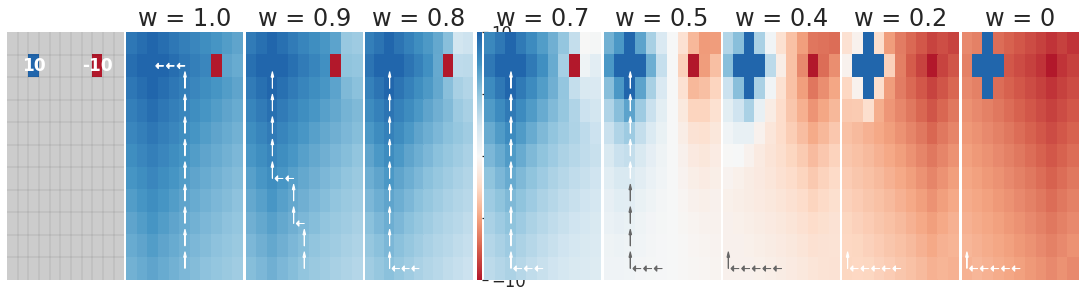

In [12]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Define parameters.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

## Simulation parameters.
# This number dictates the weight of pessimistic belief - that is,
# how strongly does the agent believe it can take the
# reward maximizing action in the future (1 = "I can always maximize", "0 = I can never maximize")
weights = [1.0, 0.9, 0.8, 0.7, 0.5, 0.4, 0.2, 0]

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Environment setup and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
## Initialize figure.
fig = plt.figure(figsize=(16,4))
cmap = palette.get_mpl_colormap()
colors = palette.hex_colors

## Initialize plots and divider.
gs = gridspec.GridSpec(1,9)
gs.update(left=0.01, right=0.94, bottom=0.04, top=0.9, hspace=0, wspace=0.02)

## Initialize environment.
gym = OpenField()

## Plot environment.
ax = plt.subplot(gs[0])
ax = gym.plot_field(reward_color=colors[-1], punishment_color=colors[0], ax=ax, 
                    annot_kws=dict(fontsize=17,fontweight='semibold',color='w'))

#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
### Value iteration and visualization.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~#

i = 0

for w in weights:
    
    print('w = ' + str(w))
    print("init Value Iteration")
    ## Initialize value iteration.
    qvi = ValueIteration(policy='pessimism', gamma=0.95, w=w, max_iter=100)
    print(qvi.policy)
    print("now fit..")
    ## Solve for Q-values.
    qvi = qvi.fit(gym)
    print(qvi.Q)
    print(qvi.V)
    print(gym.grid)
    print(gym.info)
    

    V = qvi.V.reshape(gym.shape)
    print("V is:")
    print(V)
    print(V[1,])
    print(V[1,[0,-1]])
    print(V[1,[2,-3]])

    V[1,[2,-3]] = [10, -10]         # fill in value of terminal states (this is just for plotting).    ## what is happening here?
    
    ## Solve for policy.
    print("solving for policy")
    pi = qvi.pi
    print(pi)
    
    ## Initialize canvas.
    ax = plt.subplot(gs[i+1])
    if i == 2:
        cbar = True
        divider = make_axes_locatable(ax)
        cbar_ax = divider.append_axes("right", size="5%", pad=0.05)
    else:
        cbar = False
        cbar_ax = None
    i = i+1
    
    ## Plotting.
    sns.heatmap(V, cmap=cmap, center=0, vmin=-10, vmax=10, cbar=cbar,
                xticklabels=[], yticklabels=[], ax=ax, cbar_ax=cbar_ax)
    ax = gym.plot_policy(ax, pi, color=np.where(np.abs(V.flatten()[pi]) < 2, '0.4', 'w'))
    ax.set_title(f'w = {w}', fontsize=24)
  
    ## Update colorbar.
    if cbar:
        cbar = ax.collections[0].colorbar
        cbar.set_label(r'$V(s)$', fontsize=20)

# Exercises  

For the fully optimistic agent (*$w$=1*), is there any state in the grid world from which the agent could end up visiting the threat state? Why or why not? 

**YOUR ANSWER HERE**
### > The weight parameter comtrols the degree of optimism. there is no State in the grid from which the agent could end up in the threat state with an optimistic agent w=1. This is because, the policy would always ensure to maximize the reward.i.e (from the paper) All states (even those adjacent to threat) represent the positive opportunity for reward. Also from the paper, we know that the opportunities for reward (max of Q(s, a) propagate recursively to earlier steps, but avoidable dangers do not because (the 1-w step isnt taken into account as, 1-1 = 0). I.e. agent shows more recklessness at w=1. 

In your own words, explain the agent's behavior in the fully pessimistic case (*$w$=0*). What happens to the value such that the agent gets stuck in an avoidance pattern? (hint: think about the relative contribution of the reward vs. threat to the value function)  

**YOUR ANSWER HERE**
### > in a fully pessimistic case, the pessimism policy uses w*max(Q) + (1-w)*min(Q) in addition to the reward. when w=0, the max value of reward ~ 0 so the agent always resorts to min value of reward. Since the threat value of threat is -10. it might need higher values of w to compensate for this large difference in Q values. so at lower values of w, the threat value is so large that the agent continues to avoid risk and moes furtherest away from the threat. 

Starting with 0, try a few different levels of $w$. How optimistic would the agent need to become to start "avoiding avoidance"?   

**YOUR ANSWER HERE**
### > Since persistent avoidance is actually avoiding any risk from the begining usually associated with anxious agents, so I assume "avoiding avoidance" must be wheb the agent is more brave and optimistic? this happens until w>=0.9. any lower than that, i.e. w<=0.8, one can see the agent begining to avoid any onset of threat at every state.

Based on your simulation, list at least two behavioral interventions you might try to address an agent's avoidance. 

**YOUR ANSWER HERE**

1. I might re-scale the weights to osme sort of ordinal range for the pessimistic model such that the weights are lower, when the agent is far away from the threat/reward but the weights become more optimistic the closer it gets to the reward and the weight becomes more pessimistic the closer it gets to the threat. Behaviorally, this may be akin to the phenomenon: "crossing the bridge when they get there". 

2. This is also similar to: keep increasing reward (scale) it for every state the agent crosses. Also if the agent is given the opportunity to assess reward at all of the next states just like a temporal difference learning, it might take longer but the agent will be less anxious and avoid less? Or an opportunity to "re-do" but choose different actions at a certain time point. 

3. Second option is to portray the reward to be weighted higher than the threat irrespctive of whether they are valued te same or different. i would assume that the fear for life is >>> earning $100. But if the reward was possibly large enough, the agent may be encouraged to be more "optimistic" in their approach. 


(Not sure if this is the sort of answer that was expected - I hope to understand what I did wrong, in case the answers are not what they were expected to be)

How would you test for the success of this intervention based on the behavioral predictions from this model? (hint: think about what experiment you would run and what parameters you would measure)  

**YOUR ANSWER HERE**
> I would use the Gridworld experiment or even something like a "pacman" experiment, and possibly measure the time, it takes, the path the agent takes, how optimistic or pessimistic the agent gets, depending on whether the agent has one opportunity or multiple retakes. 

Would the model as written apply to all forms of anxiety? Why or why not?

**YOUR ANSWER HERE**
> The model might not apply to individuals with PTSD or some severe forms of anxiety since they might not want to apply "do-over" approach unless the conditions/stressors affcting/causing the episodes. 

Using the examples from class as a guide, choose a task you have encountered in the literature (e.g. "go-nogo task", "social navigation task") and try to translate it to an MDP. Some questions to guide you: 

* Does this task have sequential structure? That is, does the agent need to take multiple actions before reaching a goal state?
* What are the states of the task? 
* What actions are available to the agent in this task? Is every action available in every state?
* How does an episode terminate? I.e. what are the terminal states, and from where can they be reached?
* How would you define the transition and reward functions?

**YOUR ANSWER HERE**
> 1. task (and this one is close to me as it forms part of my thesis): Clinical decison making in critical care ICU setting for patients from post-op surgery.
Goal: optimizing the policy to find a sequence sof treatment interventions that might give the best outcome  
- Agent: clinician making the decision, 
- State: the varuious physiological states the patient is at different time points in the icu. 
- Action: the clinical decision made for treatent intervention. The goal of the "agent" is to ensure the patient survives.
- Reward: Most likely be some form of 1 - survives, 0 - dies. 
- Value: The max(Qs,a) shows patient is doing well. 
- POlicy: I may use Q learning or SARSA as policy. 

2. yes the task has a sequential structure. The "agent" makes a clinical decision to undertake a sequential intervention. the "state" of the patient changes in response to the "action" taken by the "agent". the states of the task may have to be learned from the temporal "EHR" using a patient state-representation-network

3. the "agent" has a bunch of "actions" which would be a list of treatment interventions. every acton will be available at all states, however, it will be seen that some "actions" are possibly performed only on specific patient states. 

4. terminal states are: 
- patient survives: 1, 
- patient needs another surgery: 0.5,
- patient dies: 0
- patient in coma: 0.2
  
  Terminal states can be reached from all states. so if one were to visualize this, it would be somewhat like that of a wheel-and-spoke-pattern. the centre is the terminal states and the spokes connect every state to the terminal state depending on the intervention given by the physician. 

5. Transition function: similar to the Notebook but for Cliff
## define Transitions:
- post-op patient has a limited number of stages. 
- stable-stable:1
- stable-unstable yet out of risk: -0.5
- stable - unstable needs vent: -0.75
- stable - dead: -1
- unstable yet out of risk - stable: +0.5
- unstable yet out of risk - unstable needs vent: -0.5
- unstable yet out of risk - dead: 1
- unstable needs vent - stable: + 0.75
- unstable needs vent - unstable yet out of risk: +0.5
- unstable needs vent - dead: -1


## Define rewards.
      R = 1 * np.ones_like(T)              # Majority transitions
      R[:,terminal[:-1]] = unstable         # unstable transitions
      R[:,terminal[-1]] = 1                 # stable transitions
      R[terminal,terminal] = -1              # Terminal transitions
      R *= T


In [ ]:
"a"